## See this notebook
on [Kaggle](https://www.kaggle.com/code/liaoguoying/eda-data-engineering-mlp-transformer-0-12)

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


df = pd.read_csv("anxiety_attack_dataset.csv")

In [2]:
df

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,Male,Engineer,4.4,4.1,360,1,Yes,Yes,1,139,20,2,Yes,No,7,No,9,6
11996,11997,49,Female,Doctor,9.9,2.2,433,4,No,Yes,4,150,33,2,No,No,3,No,5,6
11997,11998,23,Female,Student,9.8,8.1,140,19,Yes,No,2,81,33,2,No,No,8,No,1,10
11998,11999,52,Male,Teacher,5.9,6.6,114,12,No,No,9,90,14,5,No,No,3,No,9,5


In [3]:
df.describe()

,ID,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Severity of Anxiety Attack (1-10)
count,12000.00000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,40.96675,6.482650,5.030892,246.696083,9.492833,5.462250,119.398500,25.462333,2.987417,4.518417,5.497333,5.507583
std,3464.24595,13.47328,2.014885,2.889000,144.487071,5.769364,2.897201,34.806711,8.090686,1.414482,2.866010,2.867579,2.858663
min,1.00000,18.00000,3.000000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,3000.75000,29.00000,4.800000,2.500000,122.000000,5.000000,3.000000,89.000000,18.000000,2.000000,2.000000,3.000000,3.000000
50%,6000.50000,41.00000,6.500000,5.000000,244.000000,9.000000,5.000000,119.000000,25.000000,3.000000,5.000000,5.000000,6.000000
75%,9000.25000,53.00000,8.200000,7.525000,371.000000,15.000000,8.000000,149.000000,32.000000,4.000000,7.000000,8.000000,8.000000
max,12000.00000,64.00000,10.000000,10.000000,499.000000,19.000000,10.000000,179.000000,39.000000,5.000000,9.000000,10.000000,10.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

In [5]:
df.drop('ID', axis=1, inplace=True)
df

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,28,Male,Engineer,4.4,4.1,360,1,Yes,Yes,1,139,20,2,Yes,No,7,No,9,6
11996,49,Female,Doctor,9.9,2.2,433,4,No,Yes,4,150,33,2,No,No,3,No,5,6
11997,23,Female,Student,9.8,8.1,140,19,Yes,No,2,81,33,2,No,No,8,No,1,10
11998,52,Male,Teacher,5.9,6.6,114,12,No,No,9,90,14,5,No,No,3,No,9,5


In [6]:
le = LabelEncoder()
columns = ['Gender', 'Occupation', 'Smoking', 
           'Family History of Anxiety', 'Dizziness', 
           'Medication', 'Recent Major Life Event']

mappings = {}

for column in columns:
    df[column] = le.fit_transform(df[column])
    mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# check mappings
for column, mapping in mappings.items():
    print(f"Mapping for {column}: {mapping}")

Mapping for Gender: {'Female': 0, 'Male': 1, 'Other': 2}
Mapping for Occupation: {'Doctor': 0, 'Engineer': 1, 'Other': 2, 'Student': 3, 'Teacher': 4, 'Unemployed': 5}
Mapping for Smoking: {'No': 0, 'Yes': 1}
Mapping for Family History of Anxiety: {'No': 0, 'Yes': 1}
Mapping for Dizziness: {'No': 0, 'Yes': 1}
Mapping for Medication: {'No': 0, 'Yes': 1}
Mapping for Recent Major Life Event: {'No': 0, 'Yes': 1}


In [7]:
df

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,56,0,2,9.6,8.3,175,6,0,0,4,145,33,3,0,0,4,1,9,10
1,46,1,4,6.4,7.3,97,6,0,0,3,143,18,5,1,0,0,0,9,8
2,32,0,0,6.9,1.0,467,14,0,0,2,60,34,1,0,0,7,1,10,5
3,60,1,0,9.2,3.7,471,16,0,1,6,94,19,1,0,1,4,1,5,8
4,25,1,3,9.2,2.5,364,2,0,1,7,152,15,4,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,28,1,1,4.4,4.1,360,1,1,1,1,139,20,2,1,0,7,0,9,6
11996,49,0,0,9.9,2.2,433,4,0,1,4,150,33,2,0,0,3,0,5,6
11997,23,0,3,9.8,8.1,140,19,1,0,2,81,33,2,0,0,8,0,1,10
11998,52,1,4,5.9,6.6,114,12,0,0,9,90,14,5,0,0,3,0,9,5


---

## visualization & data engineering

In [8]:
def visualize_column(df, column_name):
    unique_values = df[column_name].value_counts().sort_index()
    
    # Dynamically adjust the figure width based on the number of x-axis labels
    num_labels = len(unique_values)
    fig_width = max(6, num_labels * 0.5)  # Base width is 6, add 0.5 units for each additional label
    plt.figure(figsize=(fig_width, 6))  # Fixed height is 6
    
    unique_values.plot(kind='bar', edgecolor='black')
    plt.title(f'Count of Each Unique {column_name}')
    plt.xlabel(f'{column_name}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.tight_layout()  # Automatically adjust layout to avoid label clipping


In [9]:
unique_ages = df['Age'].value_counts().sort_index()
unique_ages

Age
18    246
19    264
20    252
21    262
22    239
23    250
24    227
25    255
26    251
27    250
28    252
29    258
30    280
31    234
32    257
33    266
34    284
35    270
36    260
37    245
38    258
39    263
40    279
41    256
42    269
43    295
44    213
45    273
46    274
47    243
48    231
49    261
50    267
51    246
52    265
53    248
54    261
55    242
56    260
57    237
58    242
59    262
60    238
61    247
62    268
63    226
64    274
Name: count, dtype: int64

idk why these ages are this much 'discrete', cuz usually in large scale dataset we can see a 'pseudo-continuous' distribution.

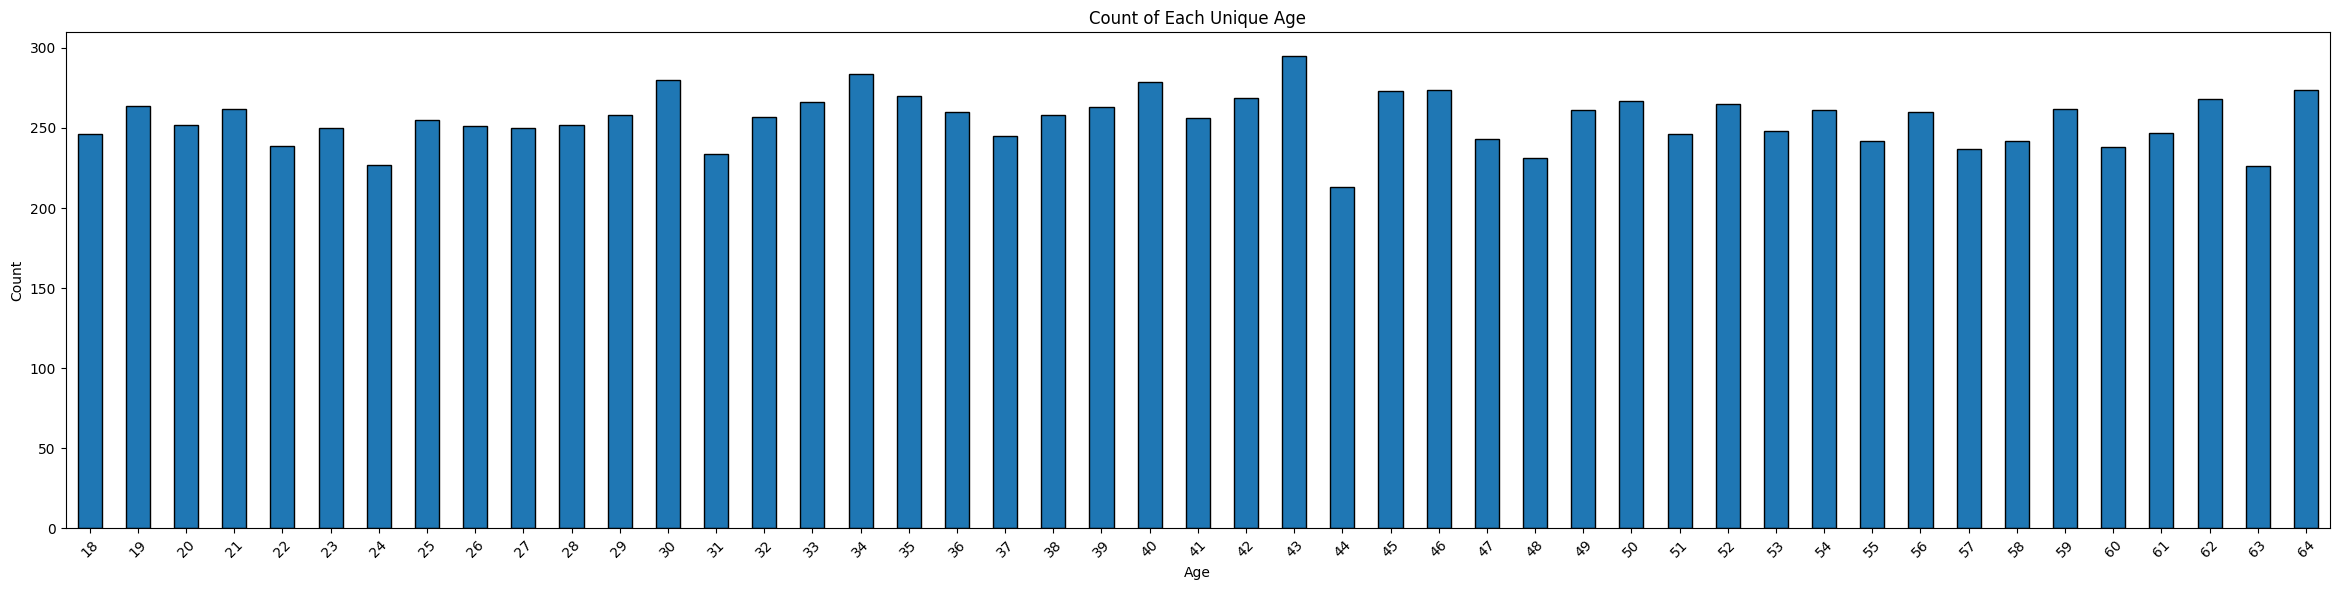

In [10]:
visualize_column(df, 'Age')

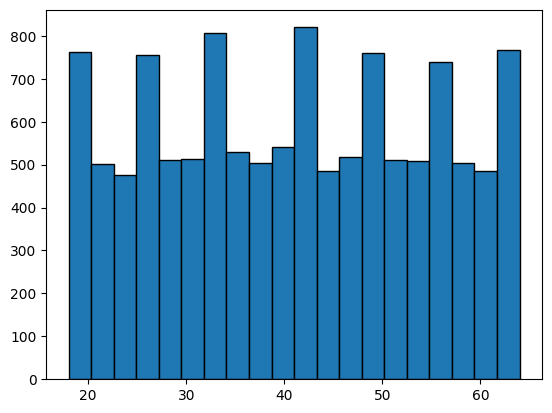

In [11]:
plt.hist(df["Age"], bins=20, edgecolor='black')
plt.show()

that is not what I call healthy data.

I want it better formed. To do so, I try to classify them using KMeans. For reusing this, I write it a func.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       Age  Class of Age
0       56             2
1       46             3
2       32             4
3       60             2
4       25             1
...    ...           ...
11995   28             4
11996   49             3
11997   23             1
11998   52             3
11999   50             3

[12000 rows x 2 columns]


               count       mean       std   min   25%   50%   75%   max
Class of Age                                                           
0             2351.0  41.013186  2.552145  37.0  39.0  41.0  43.0  45.0
1             2496.0  22.473157  2.883315  18.0  20.0  22.0  25.0  27.0
2             2254.0  60.026619  2.602399  56.0  58.0  60.0  62.0  64.0
3             2538.0  50.483058  2.872111  46.0  48.0  50.0  53.0  55.0
4             2361.0  32.045743  2.578846  28.0  30.0  32.0  34.0  36.0


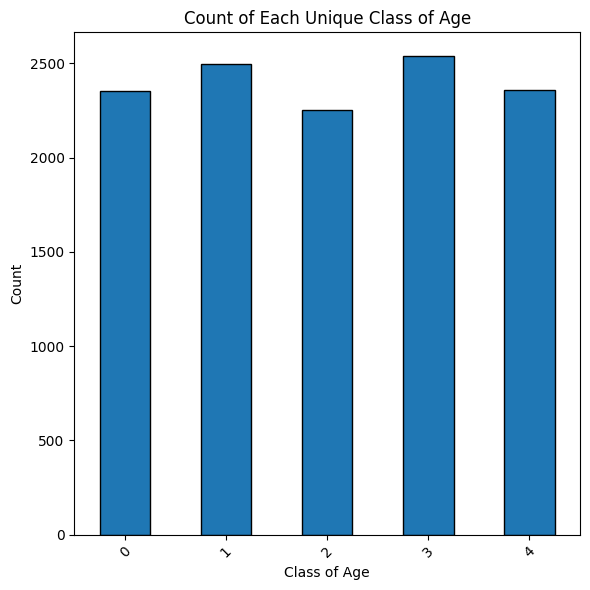

In [12]:
import numpy as np
from sklearn.cluster import KMeans

def auto_cluster(df, column_name, cluster_column_name, verbose=False):
    # Set the number of clusters
    k = 5

    # Use the best k value for clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[cluster_column_name] = kmeans.fit_predict(df[[column_name]])

    if verbose:
        # Print the original column and the cluster column
        print(df[[column_name, cluster_column_name]])
        print('\n')

        # Print the descriptive statistics for each cluster
        print(df.groupby(cluster_column_name)[column_name].describe())

        # Visualize the clusters
        visualize_column(df, cluster_column_name)

    return df

# Example usage
df = auto_cluster(df, 'Age', 'Class of Age', verbose=True)

---

lets go vis them all.

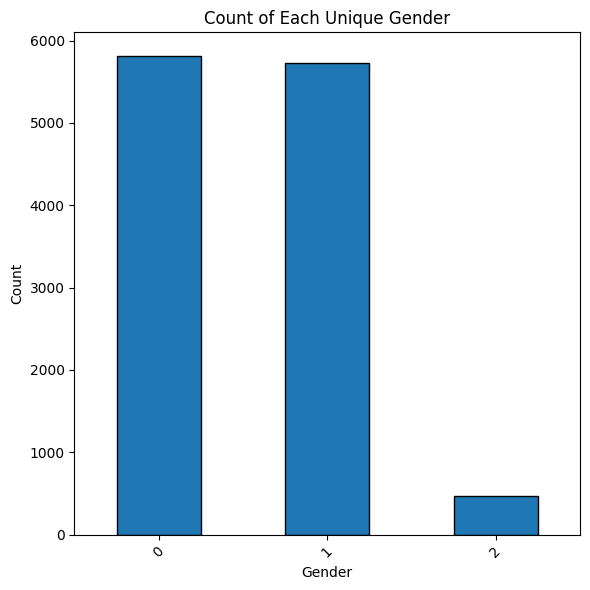

In [13]:
visualize_column(df, 'Gender')

oops, got some non-bisexual.

I want to check if non-bisexuals are more likely to have anxiety.

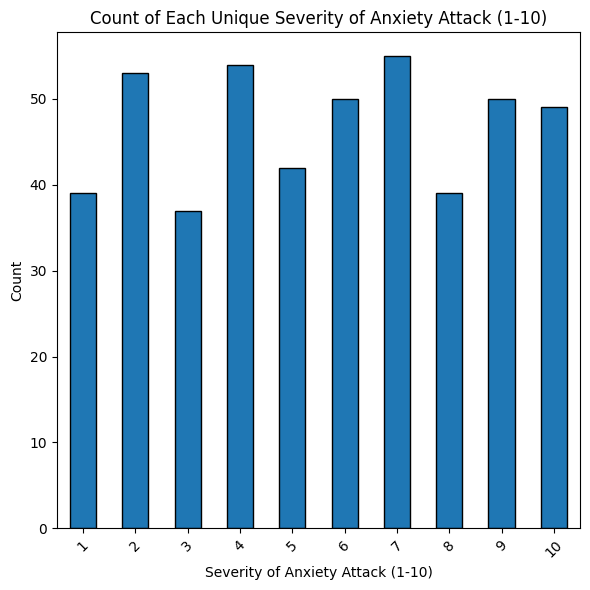

In [14]:
non_bisexuals = df[df['Gender'] == 2]

visualize_column(non_bisexuals, 'Severity of Anxiety Attack (1-10)')

In [15]:
print(non_bisexuals['Severity of Anxiety Attack (1-10)'].describe())
print('\n')
print(df[df['Gender']==0]['Severity of Anxiety Attack (1-10)'].describe())  # Male
print('\n')
print(df[df['Gender']==1]['Severity of Anxiety Attack (1-10)'].describe())  # Female

count    468.000000
mean       5.596154
std        2.846040
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Severity of Anxiety Attack (1-10), dtype: float64


count    5809.000000
mean        5.476158
std         2.861740
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Severity of Anxiety Attack (1-10), dtype: float64


count    5723.000000
mean        5.532238
std         2.856672
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: Severity of Anxiety Attack (1-10), dtype: float64


Interestingly, non-bisexuals are more likely to have anxiety than bisexuals. Meanwhile, females are more likely to have anxiety than males. 

You can see it from the mean and std.

Men just don't give a f*ck to shit things right?

---

In [16]:
df

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10),Class of Age
0,56,0,2,9.6,8.3,175,6,0,0,4,145,33,3,0,0,4,1,9,10,2
1,46,1,4,6.4,7.3,97,6,0,0,3,143,18,5,1,0,0,0,9,8,3
2,32,0,0,6.9,1.0,467,14,0,0,2,60,34,1,0,0,7,1,10,5,4
3,60,1,0,9.2,3.7,471,16,0,1,6,94,19,1,0,1,4,1,5,8,2
4,25,1,3,9.2,2.5,364,2,0,1,7,152,15,4,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,28,1,1,4.4,4.1,360,1,1,1,1,139,20,2,1,0,7,0,9,6,4
11996,49,0,0,9.9,2.2,433,4,0,1,4,150,33,2,0,0,3,0,5,6,3
11997,23,0,3,9.8,8.1,140,19,1,0,2,81,33,2,0,0,8,0,1,10,1
11998,52,1,4,5.9,6.6,114,12,0,0,9,90,14,5,0,0,3,0,9,5,3


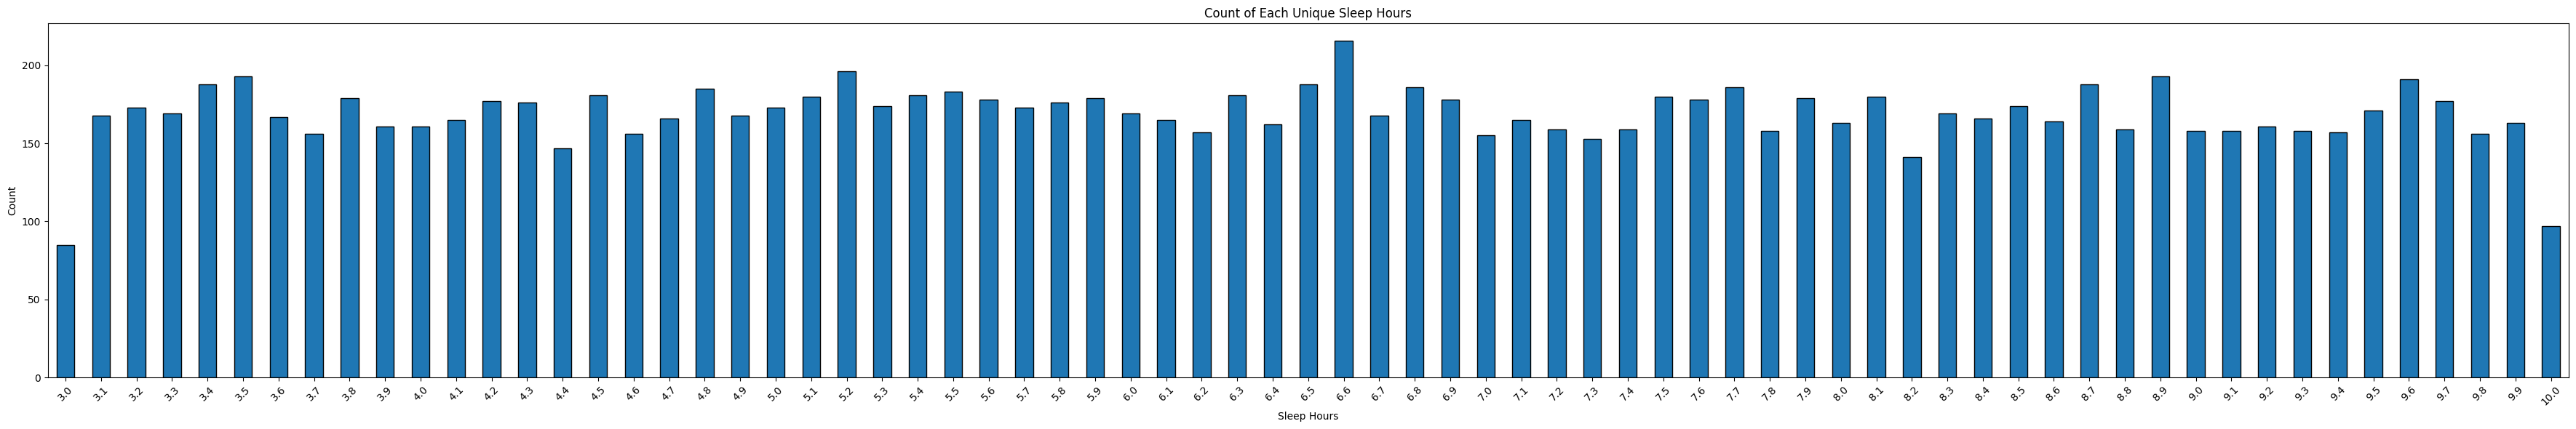

In [17]:
visualize_column(df, 'Sleep Hours')

Seems to much 'average'.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       Sleep Hours  Class of Sleep Hours
0              9.6                     1
1              6.4                     2
2              6.9                     2
3              9.2                     1
4              9.2                     1
...            ...                   ...
11995          4.4                     0
11996          9.9                     1
11997          9.8                     1
11998          5.9                     2
11999          6.6                     2

[12000 rows x 2 columns]


                       count      mean       std  min  25%  50%  75%   max
Class of Sleep Hours                                                      
0                     2617.0  5.113603  0.426060  4.4  4.8  5.1  5.5   5.8
1                     2451.0  9.276459  0.423104  8.6  8.9  9.3  9.6  10.0
2                     2269.0  6.500573  0.368711  5.9  6.2  6.5  6.8   7.1
3                     2318.0  3.670837  0.390593  3.0  3.3  3.7  4.0   4.3
4                     2345.0  

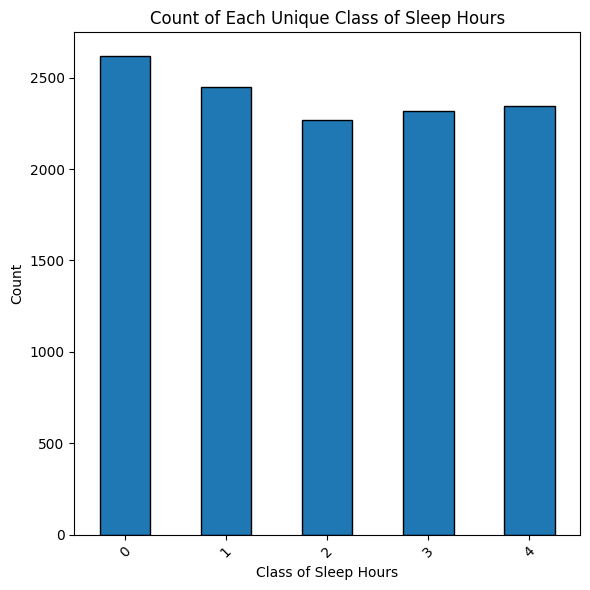

In [18]:
df = auto_cluster(df, 'Sleep Hours', 'Class of Sleep Hours', verbose=True)

here we may see, short duration sleep is class 0, followed by class 1 and 2 which are the medium and long.

---

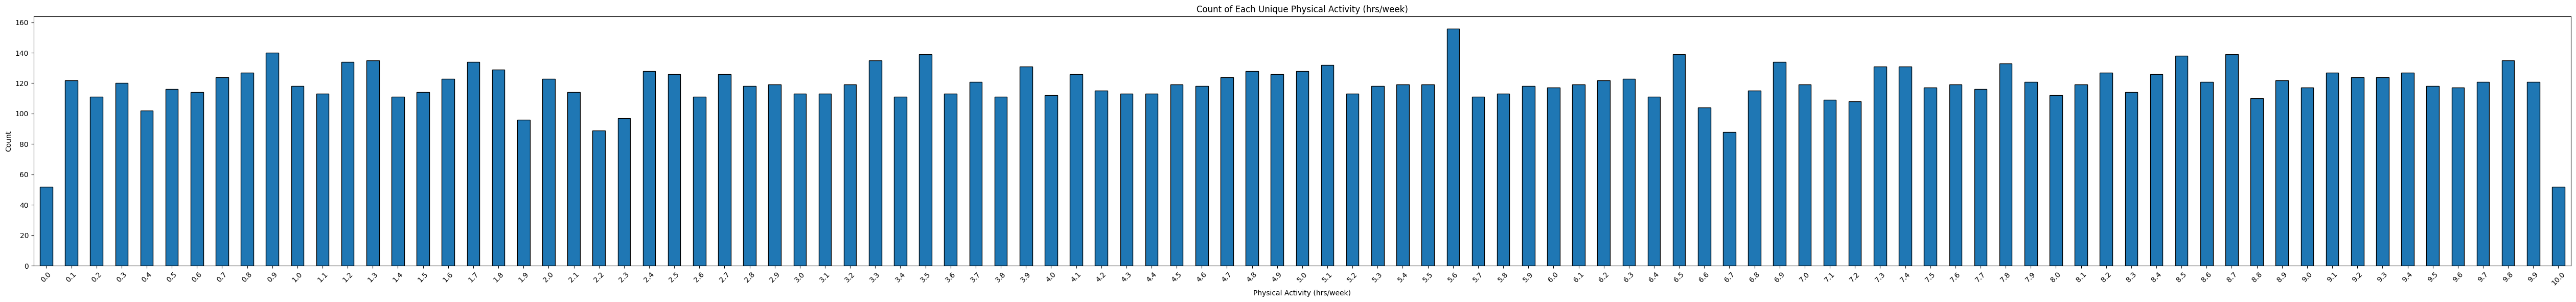

In [19]:
visualize_column(df, 'Physical Activity (hrs/week)')

we do the same trick on Physical Activity Duration.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       Physical Activity (hrs/week)  Class of Physical Activity
0                               8.3                           3
1                               7.3                           0
2                               1.0                           1
3                               3.7                           2
4                               2.5                           2
...                             ...                         ...
11995                           4.1                           4
11996                           2.2                           2
11997                           8.1                           3
11998                           6.6                           0
11999                           7.8                           0

[12000 rows x 2 columns]


                             count      mean       std  min  25%  50%  75%  \
Class of Physical Activity                                                   
0                           2488.0  7.005748  0.

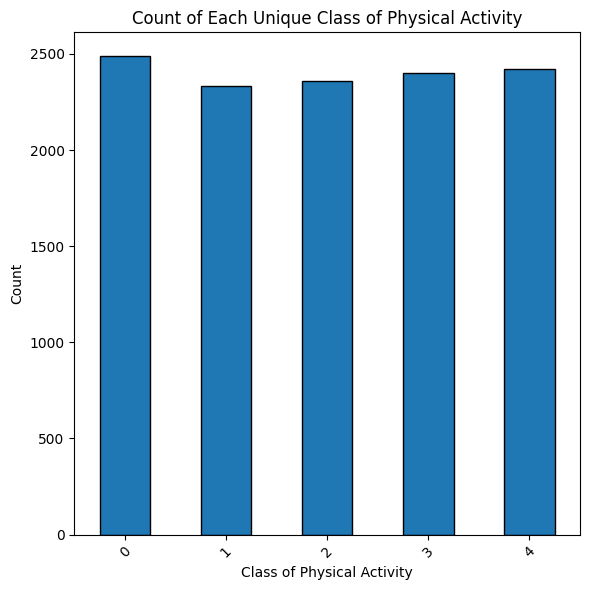

In [20]:
df = auto_cluster(df, 'Physical Activity (hrs/week)', 'Class of Physical Activity', verbose=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       Caffeine Intake (mg/day)  Class of Caffeine Intake
0                           175                         3
1                            97                         3
2                           467                         2
3                           471                         2
4                           364                         0
...                         ...                       ...
11995                       360                         0
11996                       433                         2
11997                       140                         3
11998                       114                         3
11999                       114                         3

[12000 rows x 2 columns]


                           count        mean        std    min    25%    50%  \
Class of Caffeine Intake                                                       
0                         2451.0  347.104855  29.128176  296.0  323.0  347.0   
1                         2366.0   4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       Therapy Sessions (per month)  Class of Therapy Sessions
0                                 4                          3
1                                 0                          0
2                                 7                          1
3                                 4                          3
4                                 0                          0
...                             ...                        ...
11995                             7                          1
11996                             3                          3
11997                             8                          2
11998                             3                          3
11999                             3                          3

[12000 rows x 2 columns]


                            count      mean       std  min  25%  50%  75%  max
Class of Therapy Sessions                                                     
0                          3555.0  1.007595  0.803901  0.0

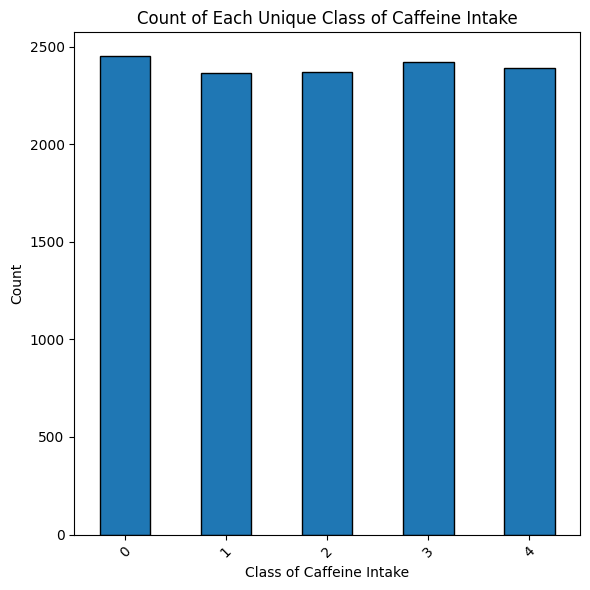

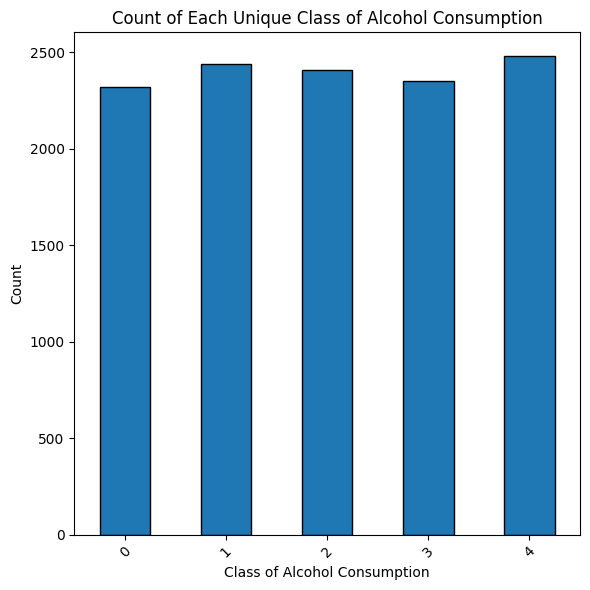

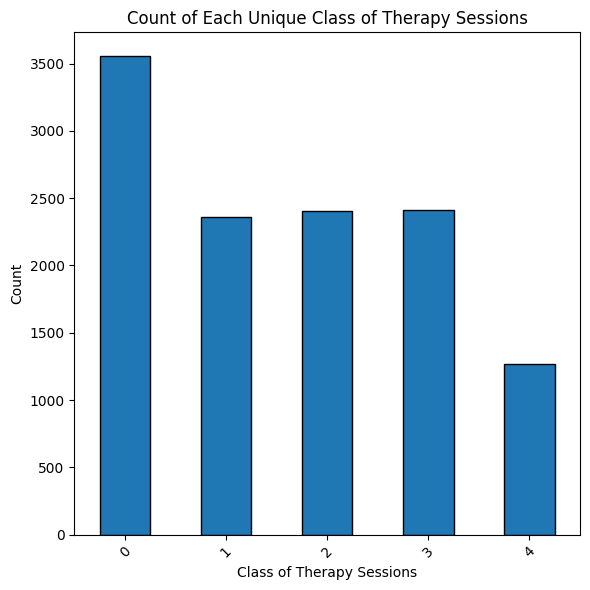

In [21]:
# Cluster Caffeine Intake (mg/day)
df = auto_cluster(df, 'Caffeine Intake (mg/day)', 'Class of Caffeine Intake', verbose=True)

# Cluster Alcohol Consumption (drinks/week)
df = auto_cluster(df, 'Alcohol Consumption (drinks/week)', 'Class of Alcohol Consumption', verbose=True)

# Cluster Therapy Sessions (per month)
df = auto_cluster(df, 'Therapy Sessions (per month)', 'Class of Therapy Sessions', verbose=True)

---

In [22]:
df.head(2)

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),...,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10),Class of Age,Class of Sleep Hours,Class of Physical Activity,Class of Caffeine Intake,Class of Alcohol Consumption,Class of Therapy Sessions
0,56,0,2,9.6,8.3,175,6,0,0,4,...,4,1,9,10,2,1,3,3,1,3
1,46,1,4,6.4,7.3,97,6,0,0,3,...,0,0,9,8,3,2,0,3,1,0


---

## Train

In [23]:
from sklearn.model_selection import train_test_split

# columns to drop:
# you can select the columns whatever you like or dislike
columns_to_drop = [
    'Severity of Anxiety Attack (1-10)',
    'Age',
    'Sleep Hours',
    'Physical Activity (hrs/week)',
    'Caffeine Intake (mg/day)',
    'Alcohol Consumption (drinks/week)',
    'Therapy Sessions (per month)'
]

X = df.drop(columns=columns_to_drop, axis=1)
y = df['Severity of Anxiety Attack (1-10)'] - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


---

### MLP

In [24]:
# import torch.nn as nn
# from KAN import KANLinear

# class MLP(nn.Module):
#     def __init__(self, input_size, hidden_sizes, output_size, use_kan=False):
#         super(MLP, self).__init__()
#         layers = []
#         last_size = input_size
        
#         if use_kan:
#             from KAN import KANLinear as Linear
#         else:
#             from torch.nn import Linear
#         # 添加隐藏层
#         for hidden_size in hidden_sizes:
#             layers.append(Linear(last_size, hidden_size))
#             layers.append(nn.ReLU())
#             last_size = hidden_size

#         # 添加输出层
#         layers.append(nn.Linear(last_size, output_size))

#         self.network = nn.Sequential(*layers)

#     def forward(self, x):
#         return self.network(x)

# # DIY hidden layers
# hidden_sizes = [16, 32, 48, 32, 16]

# mlp = MLP(input_size=X_train.shape[1], hidden_sizes=hidden_sizes, output_size=10, use_kan=True)

# mlp

In [25]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import TensorDataset, DataLoader
# from tqdm.auto import tqdm

# X_train_tensor = torch.FloatTensor(X_train.values)
# y_train_tensor = torch.LongTensor(y_train.values)
# X_test_tensor = torch.FloatTensor(X_test.values)
# y_test_tensor = torch.LongTensor(y_test.values)

# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
# test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
# test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# criterion = nn.CrossEntropyLoss()
# mlp = MLP(input_size=X_train.shape[1], hidden_sizes=hidden_sizes, output_size=10, use_kan=True)

# optimizer = optim.Adam(mlp.parameters(), lr=0.001)

# num_epochs = 100
# for epoch in range(num_epochs):
#     mlp.train()
#     train_loss = 0
#     train_correct = 0
#     train_total = 0

#     train_log_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch', leave=False, mininterval=0.1, miniters=1, dynamic_ncols=True)

#     for batch_X, batch_y in train_log_bar:
#         optimizer.zero_grad()
#         outputs = mlp(batch_X)
#         loss = criterion(outputs, batch_y)
#         loss.backward()
#         optimizer.step()

#         train_loss += loss.item()
#         _, predicted = torch.max(outputs, 1)
#         train_total += batch_y.size(0)
#         train_correct += (predicted == batch_y).sum().item()

#         batch_acc = (predicted == batch_y).float().mean().item()
#         batch_loss = loss.item()
#         train_log_bar.set_postfix(loss=batch_loss, acc=batch_acc)

#     train_accuracy = train_correct / train_total
#     train_loss /= len(train_loader)

#     mlp.eval()
#     val_loss = 0
#     val_correct = 0
#     val_total = 0

#     val_log_bar = tqdm(test_loader, desc=f'Validation', unit='batch', leave=False, mininterval=0.1, miniters=1, dynamic_ncols=True)

#     with torch.no_grad():
#         for batch_X, batch_y in val_log_bar:
#             outputs = mlp(batch_X)
#             loss = criterion(outputs, batch_y)
#             val_loss += loss.item()
#             _, predicted = torch.max(outputs, 1)
#             val_total += batch_y.size(0)
#             val_correct += (predicted == batch_y).sum().item()

#             batch_acc = (predicted == batch_y).float().mean().item()
#             batch_loss = loss.item()
#             val_log_bar.set_postfix(loss=batch_loss, acc=batch_acc)

#     val_accuracy = val_correct / val_total
#     val_loss /= len(test_loader)

#     if epoch % 10 == 0:
#         print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
#     # print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

---

### Transformer

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim

class TransformerClassifier(nn.Module):
    def __init__(self, input_size, output_size, d_model=64, nhead=4, num_encoder_layers=2, dim_feedforward=256, dropout=0.1):
        super(TransformerClassifier, self).__init__()
        
        # 线性层将输入特征映射到 d_model 维度
        self.input_proj = nn.Linear(input_size, d_model)
        
        # Transformer 编码器
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)
        
        # 分类头
        self.classifier = nn.Linear(d_model, output_size)
    
    def forward(self, x):
        # 输入投影
        x = self.input_proj(x)
        
        # Transformer 编码器需要输入形状为 (seq_len, batch_size, d_model)
        x = x.unsqueeze(0)  # 添加序列长度维度
        x = self.transformer_encoder(x)
        
        # 取序列的第一个时间步的输出作为分类依据
        x = x[0, :, :]
        
        # 分类
        x = self.classifier(x)
        return x

In [27]:
input_size = X_train.shape[1]
output_size = 10
model = TransformerClassifier(input_size=input_size, output_size=output_size)

model

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


TransformerClassifier(
  (input_proj): Linear(in_features=18, out_features=64, bias=True)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=256, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (classifier): Linear(in_features=64, out_features=10, bias=True)
)

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from tqdm.auto import tqdm
import os

# 检测可用设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 将数据转换为 PyTorch 张量并移动到设备
X_train_tensor = torch.FloatTensor(X_train.values).to(device)
y_train_tensor = torch.LongTensor(y_train.values).to(device)
X_test_tensor = torch.FloatTensor(X_test.values).to(device)
y_test_tensor = torch.LongTensor(y_test.values).to(device)

# 创建数据加载器
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=4096, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=4096, shuffle=False)

# 定义损失函数
criterion = nn.CrossEntropyLoss().to(device)

# 初始化 TransformerClassifier 并移动到设备
input_size = X_train.shape[1]
output_size = 10
model = TransformerClassifier(input_size=input_size, output_size=output_size, d_model=32,
                             nhead=4, num_encoder_layers=2, dim_feedforward=64, dropout=0.5).to(device)

# 定义优化器
optimizer = optim.AdamW(model.parameters(), lr=0.001)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [ ]:
# 初始化最佳验证准确率
best_val_accuracy = 0.0

# 训练模型
num_epochs = 20000
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0

    train_log_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch', leave=False, mininterval=0.1, miniters=1, dynamic_ncols=True)

    for batch_X, batch_y in train_log_bar:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # 将批次数据移动到设备
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += batch_y.size(0)
        train_correct += (predicted == batch_y).sum().item()

        batch_acc = (predicted == batch_y).float().mean().item()
        batch_loss = loss.item()
        train_log_bar.set_postfix(loss=batch_loss, acc=batch_acc)

    train_accuracy = train_correct / train_total
    train_loss /= len(train_loader)

    # 验证模型
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    val_log_bar = tqdm(test_loader, desc=f'Validation', unit='batch', leave=False, mininterval=0.1, miniters=1, dynamic_ncols=True)

    with torch.no_grad():
        for batch_X, batch_y in val_log_bar:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # 将批次数据移动到设备
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += batch_y.size(0)
            val_correct += (predicted == batch_y).sum().item()

            batch_acc = (predicted == batch_y).float().mean().item()
            batch_loss = loss.item()
            val_log_bar.set_postfix(loss=batch_loss, acc=batch_acc)

    val_accuracy = val_correct / val_total
    val_loss /= len(test_loader)

    # 每50个epoch打印一次训练和验证结果
    if epoch % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

    # 保存验证准确率最高的模型
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        # 删除之前的模型文件
        for filename in os.listdir():
            if filename.startswith("val_acc_") and filename.endswith(".pth"):
                os.remove(filename)
        # 保存当前模型
        model_filename = f"val_acc_{val_accuracy:.4f}.pth"
        torch.save(model.state_dict(), model_filename)
        print(f"New best model saved with val accuracy: {val_accuracy:.4f}")

In [31]:
import torch
from tqdm.auto import tqdm

# 加载预训练权重
model.load_state_dict(torch.load('/kaggle/input/transformer-weights/pytorch/default/1/val_acc_0.1204.pth', map_location=device))
# 初始化变量
val_loss = 0
val_correct = 0
val_total = 0

# 创建进度条
val_log_bar = tqdm(test_loader, desc="Validation", leave=True)

# 在验证集上进行预测
model.eval()
with torch.no_grad():  # 禁用梯度计算
    for batch_X, batch_y in val_log_bar:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # 将批次数据移动到设备
        
        # 前向传播
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # 计算损失和准确率
        val_loss += loss.item()
        _, predicted = torch.max(outputs, 1)  # 获取预测的类别
        val_total += batch_y.size(0)  # 总样本数
        val_correct += (predicted == batch_y).sum().item()  # 正确预测的样本数
        
        # 批次级别的准确率和损失
        batch_acc = (predicted == batch_y).float().mean().item()
        batch_loss = loss.item()
        val_log_bar.set_postfix(loss=batch_loss, acc=batch_acc)

# 计算整体准确率和平均损失
val_accuracy = val_correct / val_total
val_loss /= len(test_loader)

# 打印结果
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

<ipython-input-31-0951a6f30335>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/kaggle/input/transformer-weights/pytorch/default/1/val_ac

Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Validation Accuracy: 12.04%
Validation Loss: 2.6578
